## Chapter 9

In [134]:
import sys
sys.path.append("..")

In [135]:
import numpy as np
from importlib import reload
import control
import matplotlib.pyplot as plt

In [136]:
import Ch9.utilities as ch9_utils
reload(ch9_utils)

<module 'Ch9.utilities' from '../Ch9/utilities.py'>

*Notes*
* This chapter has many mathematical proof-like exercises.  Since I am mostly concerned with practical applications, I am not going to work all of these so that I can get to the applied problems more quickly.

### Problem 9.1
####  a)
Start with the given:
\begin{eqnarray}
\mathbf{\dot x} &=& A \mathbf{x} - BR^{-1}B^T \mathbf{p} \\
\mathbf{\dot p} &=& -Q \mathbf{x} - A^T \mathbf{p}
\end{eqnarray}
Plug in $\mathbf{p} = M \mathbf{x}$ into the two equations to get:
\begin{eqnarray}
\mathbf{\dot x} &=& (A - BR^{-1}B^T M) \mathbf{x} \\
\mathbf{\dot p} &=& \dot M \mathbf{x} + M \mathbf{\dot x} \\
&=& (-Q - A^T M) \mathbf{x}  
\end{eqnarray}
Now, we have the equality:
\begin{eqnarray}
[\dot M + M(A - BR^{-1}B^T M)] \mathbf{x} = (-Q - A^T M) \mathbf{x}.
\end{eqnarray}
This can only be true for any arbitrary $\mathbf{x}$ when:
\begin{eqnarray}
-\dot M = MA - MBR^{-1}B^T M + Q + A^T M
\end{eqnarray}
which is the Riccati equation from Eqn 9.27.

#### b)
By Part a) and linearity,
\begin{eqnarray}
M(t, T) \mathbf{x}(t) = \mathbf{p}(t) &=& [\Psi_{21}(t-T) + \Psi_{21}(t-T) M(T, T)] \mathbf{x}(T) \\
M(t, T) \mathbf{x}(t) &=& M(t, T) [\Psi_{11}(t-T) + \Psi_{12}(t-T) M(T, T)] \mathbf{x}(T)
\end{eqnarray}
which implies
\begin{eqnarray}
[\Psi_{21}(t-T) + \Psi_{21}(t-T) M(T, T)] = M(t, T) [\Psi_{11}(t-T) + \Psi_{12}(t-T) M(T, T)]
\end{eqnarray}
or, as the desired final result,
\begin{eqnarray}
M(t, T) = [\Psi_{21}(t-T) + \Psi_{21}(t-T) M(T, T)] [\Psi_{11}(t-T) + \Psi_{12}(t-T) M(T, T)]^{-1}
\end{eqnarray}

This results from a backward-time consideration.  The other result can be found via a similar forward-time consideration:
\begin{eqnarray}
M(T, T) \mathbf{x}(T) = \mathbf{p}(T) &=& [\Psi_{21}(T-t) + \Psi_{21}(T-t) M(t, T)] \mathbf{x}(t) \\
M(T, T) \mathbf{x}(T) &=& M(T, T) [\Psi_{11}(T-t) + \Psi_{12}(T-t) M(t, T)] \mathbf{x}(T)
\end{eqnarray}
which implies
\begin{eqnarray}
\Psi_{21}(T-t) + \Psi_{21}(T-t) M(t, T) &=& M(T, T) [\Psi_{11}(T-t) + \Psi_{12}(T-t) M(t, T)] \\
[\Psi_{21}(T-t) - M(T, T) \Psi_{12}(T-t)] M(t, T) &=& [M(T, T) \Psi_{11}(T-t) - \Psi_{21}(T-t)]
\end{eqnarray}
or, as the desired final result,
\begin{eqnarray}
M(t, T) = [\Psi_{21}(T-t) - M(T, T) \Psi_{12}(T-t)]^{-1} [M(T, T) \Psi_{11}(T-t) - \Psi_{21}(T-t)].
\end{eqnarray}

This doesn't match the book's result, but I was unable to derive that one.  The approach above makes sense to me, so perhaps the book had a type.

### Problem 9.2
_omitted_

### Problem 9.3
#### a)
Assume $\lambda$ is an eigenvalue of $H$.  It suffices to show that $-\lambda$ is an eigenvalue too.  $H$ is hamiltonian iff $H^TJ = -JH$, where
\begin{eqnarray}
J = \begin{pmatrix}
0 & I \\
-I & 0
\end{pmatrix}
\end{eqnarray}
This implies that $-J H J^T = H^T$.

Back to the eigenvalue problem:
\begin{eqnarray}
H \mathbf{v} = \lambda \mathbf{v} \\
&(\implies)& (H \mathbf{v})^T = (\lambda \mathbf{v})^T \\
&(\implies)& \mathbf{v}^T H^T = \mathbf{v}^T \lambda \\
&(\implies)& \mathbf{v}^T (-J H J^T) J = \mathbf{v}^T J \lambda \\
&(\implies)& \mathbf{v}^T -J H = \mathbf{v}^T J \lambda \\
&(\implies)& (\mathbf{v}^T J H)^T = (\mathbf{v}^T J)^T (-\lambda) \\
&(\implies)& H^T (J^T \mathbf{v}) = -\lambda (J^T \mathbf{v}) \\
\end{eqnarray}
and so $-\lambda$ is an eigenvalue of $H^T$.  Since the eigenvalues of a matrix and it's transpose are the same, $-\lambda$ is then an eigenvalue for $H$.

#### b)
The solution to this problem follows directly from the following fact:
* If $\mathbf{v}$ is an eigenvector of $H$ with eigenvalue $\lambda$, then $\mathbf{v}$ is an eigenvector of $e^{Ht}$ with eigenvalue $e^{\lambda t}$.
The formula for a matrix exponential can be used to verify this fact, so I am not going to work the problem further.

### Problem 8.4
Try a proof by contradiction:
Assume that $(A, B)$ is stabilizable and $(A, C)$ is detectable with $Q = C^T C$, but the closed loop system in question is unstable.  Furthermore, let $\mathbf{v}$ be an unstable eigenvector of $A_c \triangleq A - B R^{-1} B^T \bar M$ with eigenvalue $\lambda > 0$.  We already know that $\lambda$ is real, from the previous problem.  If $\mathbf{x}(t_0) = \mathbf{v}$, then $\mathbf{x}(t) = e^{t - t_0} \mathbf{v}$ for all time $t > t_0$.  Since $(A, B)$ is stabilizable, so 
\begin{eqnarray}
\int_{t_0}^\infty \mathbf{x}^T Q \mathbf{x} + \mathbf{u}^T R \mathbf{u} d \tau < \infty 
\end{eqnarray}
which can only happen when both terms in the integral are finite:
\begin{eqnarray}
\int_{t_0}^\infty \mathbf{x}^T Q \mathbf{x} d \tau &=& \int_{t_0}^\infty \mathbf{v}^T Q \mathbf{v} e^{2 \lambda (t-t_0)} d \tau \\
\int_{t_0}^\infty (C \mathbf{v})^T C \mathbf{v} e^{2 \lambda (t-t_0)} d \tau &<& \infty \implies C \mathbf{v} = 0 \\
\int_{t_0}^\infty \mathbf{u}^T R \mathbf{u} d \tau &=& \int_{t_0}^\infty \mathbf{v}^T \bar M B R^{-1} B^T \bar M^T  \mathbf{v} e^{2 \lambda (t-t_0)} d \tau \\
&=& \int_{t_0}^\infty \mathbf{v}^T \bar M B R^{-1} B^T \bar M^T  \mathbf{v} e^{2 \lambda (t-t_0)} d \tau \\
&=& \int_{t_0}^\infty \mathbf{v}^T \bar M B R^{-1} B^T \bar M  \mathbf{v} e^{2 \lambda (t-t_0)} d \tau \\
&<& \infty \implies R^{-1} B^T \bar M \mathbf{v} = 0 
\end{eqnarray}
So, then the closed loop response from $\mathbf{v}$ would be the same as the corresponding open-loop response.  That is, $A_c \mathbf{v} = A \mathbf{v} = \lambda {v}$.  Combining this fact with the above, we have:
\begin{eqnarray}
\begin{pmatrix}
\lambda I - A \\
C
\end{pmatrix} \mathbf{v} = \begin{pmatrix}
0 \\
0
\end{pmatrix}
\end{eqnarray}
but $(A, C)$ is detectable by construction, which provides the needed contradiction.

Therefore, the closed loop poles are in the left-half plane.

The margins for the compensator with reduced-order observer are significantly better.  The root locus indicates some nice pole-zero cancellation (dots are very near x's near the line $y=0$ above).  There is the same number of poles as zeros in the reduced order observer case.  This compensator is lower order with better closed-loop stability properties.  This is pretty cool, I think.

### Problem 9.5
#### a)
This result has been obtained previously, so I won't rederive.  See Chapter 4 for the result.

#### b)
The first hint says to add $sM - sM$ to the left-hand side; do this and rearrange to get ($\Phi^{-T}(-s) \triangleq [\Phi^{-1}(-s)]^T$):
\begin{eqnarray}
Q = M(sI - A) + ((-s)I - A^T)M + \frac{MB B^T M}{r^2} &=& M \Phi^{-1}(s) + \Phi^{-T}(-s)M + \frac{MB B^T M}{r^2}
\end{eqnarray}

The second hint states to left multiply both sides by $B^T$ and right multiply by $B$, but this didn't make sense given the $\Phi^{-1}$ terms in the above expression.  So, I left multiplied by $B^T \Phi^{T}(-s)$ and right multiplied by $\Phi(s)B$.  This process, along with using the fact that $MB = r^2 G$, equivalently $B^T M = r^2 G^T$:
\begin{eqnarray}
B^T \Phi^{T}(-s) Q \Phi(s) B &=& r^2 (B^T \Phi^{T}(-s) G + G^T \Phi(s) B + B^T \Phi^T(-s)G G^T \Phi(s) B) \\
\implies \frac{B^T \Phi^{T}(-s) Q \Phi(s)B}{r^2} &=& B^T \Phi^{T}(-s) G + G^T \Phi(s) B + B^T \Phi^T(-s)G G^T \Phi(s) B
\end{eqnarray}
Expand the actual product for $T^T(-s) T(s)$:
\begin{eqnarray}
T^T(-s) T(s) &=& (I + B^T \Phi^T(-s) G^T)(I + G \Phi(s) B) \\
&=& I + B^T \Phi^T(-s) G^T + G \Phi(s) B + B^T \Phi^T(-s) G^T G \Phi(s) B \\
&\equiv& I + \frac{B^T \Phi^{T}(-s) Q \Phi(s) B}{r^2}
\end{eqnarray}

#### c)
The square root of the eigenvalues of $S(\omega) \triangleq T^T(-j \omega)T(j \omega)$ are the singular values of the return-difference $T$.  To prove that $S(\omega) = I + \frac{B^T \Phi^{T}(-s) Q \Phi(s) B}{r^2}$ must have singular values greater than or equal to 1 for all $\omega \in \mathbb{R}$, consider the quadratic form of the expression:
\begin{eqnarray}
\frac{B^T \Phi^{T}(-s) Q \Phi(s) B}{r^2} &=& \frac{B^T \Phi^{T}(-s) C^T C \Phi(s) B}{r^2} \\
&=& \frac{1}{r^2}(C \Phi(j \omega) B)^H (C \Phi(j \omega) B)
\end{eqnarray}
with $(\cdot)^H$ being the complex conjugate and $C$ being a real matrix of appropriate dimension.

The matrix $S(\omega)$ is then symmetric positive-definite, because it is the sum of a symmetric positive definite matrix ($I$) and a symmetric positive semi-definite matrix $\frac{1}{r^2}(C \Phi(j \omega) B)^H (C \Phi(j \omega) B)$.  Because $S$ is symmetric positive definite, it is _orthogonally diagonalizable_.  This last part is what gives the desired conclusion: No matter the choice of $r$, the eigenvalues of $S(\omega)$ must be greater than 1 for any non-trivial linear dynamical system.

### Problem 9.6
#### a) and b)

Tabulating Gains...
q1 = 0.001 -> G = [[0.001     0.0009985]], poles = [-0.00300001 -0.9999955 ]
q1 = 0.01 -> G = [[0.01       0.00985434]], poles = [-0.03001352 -0.99954949]
q1 = 0.1 -> G = [[0.1        0.08830369]], poles = [-0.31622777 -0.9486833 ]
q1 = 1.0 -> G = [[1.         0.54858377]], poles = [-1.32287566+1.11803399j -1.32287566-1.11803399j]
q1 = 10.0 -> G = [[10.          2.27008323]], poles = [-3.90512484+3.84057287j -3.90512484-3.84057287j]
q1 = 100.0 -> G = [[100.           7.83843378]], poles = [-12.25765067+12.23723825j -12.25765067-12.23723825j]
q1 = 1000.0 -> G = [[999.99999257  25.48870706]], poles = [-38.7330606+38.72660577j -38.7330606-38.72660577j]
Plotting Initial Response...


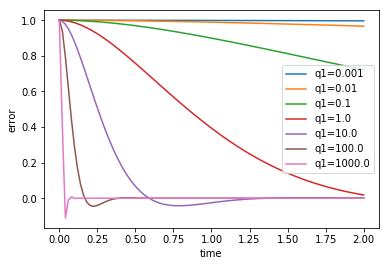

In [137]:
alp, bet = 1., 3.
A = np.array([[0, 1], [0, -alp]])
B = np.array([[0], [bet]])
C = np.array([[1, 0]])
D = np.zeros((1, 1))
q1 = np.array([1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3])
R = np.array([[1.]])
T = np.linspace(0, 5, 51)
yout = np.empty((len(T), len(q1)))
x0 = np.array([[1], [0]])
plt.figure()
print('Tabulating Gains...')
for i,_q in enumerate(q1):
    Q = np.array([[_q**2, 0], [0, 0]]).astype('float').reshape((2, 2))
    G, _, _ = control.lqr(A, B, Q, R)
    G = G.reshape((1, 2))
    e, _ = np.linalg.eig(A-B@G)
    print('q1 = {} -> G = {}, poles = {}'.format(_q, G, e))
    t, y = ch9_utils.initialResponse(A, B, C, D, x0, 0, 2, .02, G)
    plt.plot(t, y[:, 0], label='q1={}'.format(_q))
plt.legend()
plt.xlabel('time')
plt.ylabel('error')
print('Plotting Initial Response...')
plt.show()

#### c) and d)

Tabulating Gains...
q1 = 0.1:
  q2 = 0.010000000000000002 -> G = [[0.1        0.08842226]], poles = [-0.31605006 -0.94921671]
  q2 = 0.1 -> G = [[0.1 0.1]], poles = [-0.3 -1. ]
  q2 = 1.0 -> G = [[0.1        0.75192137]], poles = [-0.09491109 -3.16085303]
q1 = 0.2:
  q2 = 0.020000000000000004 -> G = [[0.2        0.16148425]], poles = [-0.74222638+0.2215852j -0.74222638-0.2215852j]
  q2 = 0.2 -> G = [[0.2 0.2]], poles = [-0.6 -1. ]
  q2 = 2.0 -> G = [[0.2        1.72687162]], poles = [-0.09865237 -6.08196249]
q1 = 1.5:
  q2 = 0.15000000000000002 -> G = [[1.5        0.73137842]], poles = [-1.59706763+1.3962002j -1.59706763-1.3962002j]
  q2 = 1.5 -> G = [[1.5 1.5]], poles = [-1.  -4.5]
  q2 = 15.0 -> G = [[ 1.5        14.70365809]], poles = [ -0.09997556 -45.01099871]
Plotting Initial Response...


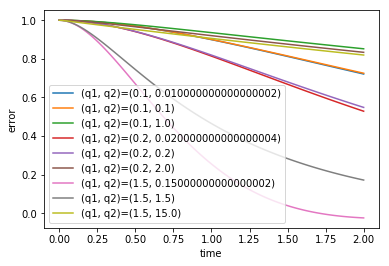

In [138]:
alp, bet = 1., 3.
A = np.array([[0, 1], [0, -alp]])
B = np.array([[0], [bet]])
C = np.array([[1, 0]])
D = np.zeros((1, 1))
q1 = np.array([1e-1, 2e-1, 1.5])
R = np.array([[1.]])
T = np.linspace(0, 5, 51)
yout = np.empty((len(T), len(q1)))
x0 = np.array([[1], [0]]).astype('float')
plt.figure()
print('Tabulating Gains...')
for i,_q1 in enumerate(q1):
    print('q1 = {}:'.format(_q1))
    for _q2 in (1e-1*_q1, _q1, 1e1*_q1):
        Q = np.array([[_q1**2, 0], [0, _q2**2]]).astype('float')
        G, _, _ = control.lqr(A, B, Q, R)
        G = G.reshape((1, 2))
        e, _ = np.linalg.eig(A-B@G)
        print('  q2 = {} -> G = {}, poles = {}'.format(_q2, G, e))
        t, y = ch9_utils.initialResponse(A, B, C, D, x0, 0, 2, .02, G)
        plt.plot(t, y[:, 0], label='(q1, q2)=({}, {})'.format(_q1, _q2))
plt.legend()
plt.xlabel('time')
plt.ylabel('error')
print('Plotting Initial Response...')
plt.show()

Penalizing the error rate eliminates the overshoot seen in Parts a) and b).  This is similar to the addition of a D-term in a PD controller, which is as expected.

### Problem 9.7
#### a)
The $q^2$-term will weight how strongly the control should keep constant distance between the cars.  We wouldn't want the attached cars to move relative to each other.

#### b)
The $R$ matrix is easy:
\begin{eqnarray}
R = \begin{pmatrix}
r^2
\end{pmatrix}
\end{eqnarray}
The $Q$ matrix requires more doing.  The expanded form of the state-dependent part of the integral is:
\begin{eqnarray}
\mathbf{x}^T Q \mathbf{x} = (1+q^2)x_1^2 + 2(1-q^2)x_1 x_2 + (1+q^2)x_2^2.
\end{eqnarray}
Try the following form for Q:
\begin{eqnarray}
Q = \begin{pmatrix}
q_1 & q_2 & 0 & 0 \\
q_2 & q_3 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{pmatrix}
\end{eqnarray}
which results in:
\begin{eqnarray}
q_1x_1^2 + 2q_2 x_1 x_2 + q_3x_2^2 = (1+q^2)x_1^2 + 2(1-q^2)x_1 x_2 + (1+q^2)x_2^2 \\
\end{eqnarray}
which yields
\begin{eqnarray}
Q = \begin{pmatrix}
1+q^2 & 1-q^2 & 0 & 0 \\
1-q^2 & 1+q^2 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{pmatrix}
\end{eqnarray}

#### c)

In [139]:
# with K, M, k, R, r = 40, 1, 2, 100, 0.02
A = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [-40, 40, -100, 0], [40, -40, 0, -100]]).astype('float')
B = np.array([[0], [0], [1], [0]]).astype('float')
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]]).astype('float')
q2 = np.array([1e-4, 1e-2, 1]) # anything greater than one is numerically unstable, by empirical consideration
r2 = np.array([1e-4, 1e-2, 1, 1e2, 1e4])
for _q2 in q2:
    for _r2 in r2:
        Q = np.array([[1+_q2, 1-_q2, 0, 0], [1+_q2, 1-_q2, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]).astype('float')
        R = np.array([_r2]).astype('float')
        G, _, _ = control.lqr(A, B, Q, R)
        e = np.linalg.eigvals(A-B@G)
        print('  q^2 = {}, r^2 = {} -> G = {}, poles = {}'.format(_q2, _r2, G, e))

  q^2 = 0.0001, r^2 = 0.0001 -> G = [[100.00166303  99.99333691   0.99506585   0.99498292]], poles = [ -1.00024173  -0.80632976 -99.19349499 -99.99499938]
  q^2 = 0.0001, r^2 = 0.01 -> G = [[9.99983296 9.99966703 0.09994838 0.09994672]], poles = [-8.06505450e-01 -9.99974316e-02 -9.91934955e+01 -9.99999500e+01]
  q^2 = 0.0001, r^2 = 1.0 -> G = [[0.99997592 0.99997408 0.00999926 0.00999924]], poles = [-9.99974993e-03 -8.06504504e-01 -9.91934955e+01 -9.99999995e+01]
  q^2 = 0.0001, r^2 = 100.0 -> G = [[0.09999751 0.09999749 0.00099997 0.00099997]], poles = [-9.99974996e-04 -8.06504495e-01 -9.91934955e+01 -1.00000000e+02]
  q^2 = 0.0001, r^2 = 10000.0 -> G = [[9.99975984e-03 9.99975966e-03 9.99975484e-05 9.99975466e-05]], poles = [-9.99975975e-05 -8.06504495e-01 -9.91934955e+01 -1.00000000e+02]
  q^2 = 0.01, r^2 = 0.0001 -> G = [[100.16608521  99.33328822   0.99669386   0.988399  ]], poles = [ -1.01777312  -0.79047711 -99.19344384 -99.99499979]
  q^2 = 0.01, r^2 = 0.01 -> G = [[9.98326704 

#### d)
$q^2$ should be no greater than one; the form of $Q$ is no longer positive semidefinite in this case.  For stronger springs, $q^2$ closer to one is more appropriate, as the high spring constant will lead to minimal separation between cars passively.  Control saturation should be considered when choosing $q^2$ and $r^2$.

In [140]:
A = np.array([[0, 1], [0, -3]]).astype('float')
B = np.array([[0], [1]]).astype('float')
C = np.array([[1, 0]]).astype('float')
D = np.zeros((1, 1)).astype('float')
q1 = np.array([1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3])
R = np.array([[1.]])
T = np.linspace(0, 5, 51)
yout = np.empty((len(T), len(q1)))
x0 = np.array([[1], [0]]).astype('float')
for i,_q in enumerate(q1):
    Q = np.array([[_q**2, 0], [0, 0]]).astype('float')
    G, _, _ = control.lqr(A, B, Q, R)
    x = ch9_utils.initialResponse(A, B, C, D, x0, 0, 5, .02, G)

### Problem 9.8
#### a)
The $R$ matrix:
\begin{eqnarray}
R = r^2  \begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
\end{eqnarray}
The $Q$ matrix is the same as in Problem 9.7:
\begin{eqnarray}
Q = \begin{pmatrix}
1+q^2 & 1-q^2 & 0 & 0 \\
1-q^2 & 1+q^2 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{pmatrix}
\end{eqnarray}

In [142]:
# with K, M, k, R, r = 40, 1, 2, 100, 0.02
A = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [-40, 40, -100, 0], [40, -40, 0, -100]]).astype('float')
B = np.array([[0, 0], [0, 0], [1, 0], [0, 1]]).astype('float')
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]]).astype('float')
q2 = np.array([1e-4, 1e-2, 1]).astype('float')  # anything greater than one is numerically unstable, by empirical consideration
r2 = np.array([1e-4, 1e-2, 1, 1e2, 1e4])
for _q2 in q2:
    for _r2 in r2:
        Q = np.array([[1+_q2, 1-_q2, 0, 0], [1+_q2, 1-_q2, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]).astype('float')
        R = np.array([[_r2, 0], [0, _r2]]).astype('float')
        G, _, _ = control.lqr(A, B, Q, R)
        e = np.linalg.eigvals(A-B@G)
        #print('  q^2 = {}, r^2 = {} -> G = {}, poles = {}'.format(_q2, _r2, G, e))

#### b)
Well, there are two motors so, naively, I would expect that there would be less risk of control saturation.  This is evidenced by the lower feedback command to apply to each motor.  The charts below show a "non-minimum phase"-looking behavior for the one motor control law.

Plotting Initial Response...


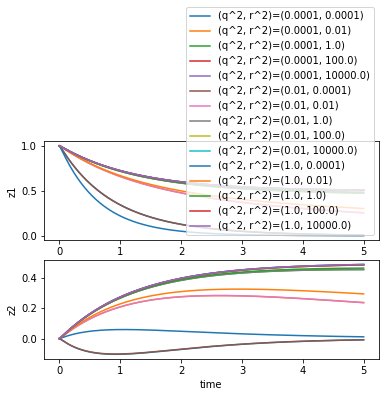

In [143]:
# with K, M, k, R, r = 40, 1, 2, 100, 0.02
A = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [-40, 40, -100, 0], [40, -40, 0, -100]]).astype('float')
B = np.array([[0, 0], [0, 0], [1, 0], [0, 1]]).astype('float')
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]]).astype('float')
q2 = np.array([1e-4, 1e-2, 1])# anything greater than one is numerically unstable, by empirical consideration
r2 = np.array([1e-4, 1e-2, 1, 1e2, 1e4])
x0 = np.array([[1], [0], [0], [0]]).astype('float')
plt.subplot(211)
for _q2 in q2:
    for _r2 in r2:
        Q = np.array([[1+_q2, 1-_q2, 0, 0], [1+_q2, 1-_q2, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]).astype('float')
        R = np.array([[_r2, 0], [0, _r2]]).astype('float')
        G, _, _ = control.lqr(A, B, Q, R)
        G = G.reshape((2, 4))
        e = np.linalg.eigvals(A-B@G)
        t, y = ch9_utils.initialResponse(A, B, C, D, x0, 0, 5, .02, G)
        plt.plot(t, y[:, 0], label='(q^2, r^2)=({}, {})'.format(_q2, _r2))
plt.legend()
plt.xlabel('time')
plt.ylabel('z1')
plt.subplot(212)
for _q2 in q2:
    for _r2 in r2:
        Q = np.array([[1+_q2, 1-_q2, 0, 0], [1+_q2, 1-_q2, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]).astype('float')
        R = np.array([[_r2, 0], [0, _r2]]).astype('float')
        G, _, _ = control.lqr(A, B, Q, R)
        G = G.reshape((2, 4))
        e = np.linalg.eigvals(A-B@G)
        t, y = ch9_utils.initialResponse(A, B, C, D, x0, 0, 5, .02, G)
        plt.plot(t, y[:, 1])
plt.xlabel('time')
plt.ylabel('z2')
print('Plotting Initial Response...')
plt.show()

Plotting Initial Response...


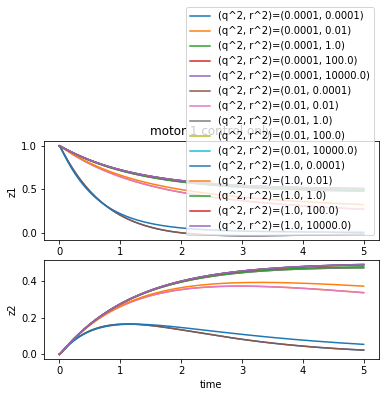

In [100]:
# Compare to 9.7:
# with K, M, k, R, r = 40, 1, 2, 100, 0.02
A = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [-40, 40, -100, 0], [40, -40, 0, -100]]).astype('float')
B = np.array([[0], [0], [1], [0]]).astype('float')
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]]).astype('float')
q2 = np.array([1e-4, 1e-2, 1]).astype('float')  # anything greater than one is numerically unstable, by empirical consideration
r2 = np.array([1e-4, 1e-2, 1, 1e2, 1e4])
x0 = np.array([[1], [0], [0], [0]]).astype('float')
plt.subplot(211)
for _q2 in q2:
    for _r2 in r2:
        Q = np.array([[1+_q2, 1-_q2, 0, 0], [1+_q2, 1-_q2, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]).astype('float')
        R = np.array([_r2]).astype('float')
        G, _, _ = control.lqr(A, B, Q, R)
        G = G.reshape((1, 4))
        e = np.linalg.eigvals(A-B@G)
        t, y = ch9_utils.initialResponse(A, B, C, D, x0, 0, 5, .02, G)
        plt.plot(t, y[:, 0], label='(q^2, r^2)=({}, {})'.format(_q2, _r2))
plt.legend()
plt.title('motor 1 control only')
plt.xlabel('time')
plt.ylabel('z1')
plt.subplot(212)
for _q2 in q2:
    for _r2 in r2:
        Q = np.array([[1+_q2, 1-_q2, 0, 0], [1+_q2, 1-_q2, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]).astype('float')
        R = np.array([_r2]).astype('float')
        G, _, _ = control.lqr(A, B, Q, R)
        G = G.reshape((1, 4))
        e = np.linalg.eigvals(A-B@G)
        t, y = ch9_utils.initialResponse(A, B, C, D, x0, 0, 5, .02, G)
        plt.plot(t, y[:, 1])
plt.xlabel('time')
plt.ylabel('z2')
print('Plotting Initial Response...')
plt.show()

### Problem 9.9
#### a)
_This part can be done by finding the solution of the matrix Riccati equation given the dynamics matrices A,B, but this part is not worth the time to do it, in my opinion._

#### b)

In [144]:
HoverJd, KDoverJd, KQoverJd = 3000., 30., 60.
A = np.array([[0., 0., 1., 0.],
             [0., 0., 0., 1.],
             [-KDoverJd, -KQoverJd, 0., -HoverJd],
             [KQoverJd, -KDoverJd, HoverJd, 0.]]).astype('float')
B = np.array([[0., 0.],
            [0., 0.],
            [1., 0.],
            [0., 1.]]).astype('float')
C = np.array([[1., 0., 0., 0.],
            [0., 1., 0., 0.]]).astype('float')
D = np.zeros((2, 2)).astype('float')
E = np.array([[-1., 0.],
              [0., -1.],
              [0., 0.],
              [0., 0.]]).astype('float')
q2 = np.array([1.6e10]) # this is as close as I care to go to the ~-5000rad/s requirement (the lqr algorithm may be having numerical issues beyond this point)
R = np.eye(2)
Q = np.zeros((4, 4))
for _q2 in q2:
    Q[0, 0], Q[1, 1] = _q2, _q2
    G, S, _ = control.lqr(A, B, Q, R)
    print('G = {}'.format(G))
    e = np.linalg.eigvals(A-B@G)
    print('poles = {}'.format(e))

G = [[ 3.51414007e+03  1.26000156e+05  8.41666497e+01  1.10724991e-02]
 [-1.26305147e+05  3.58486145e+03  1.10724991e-02  8.42686443e+01]]
poles = [-42.14674798+3.00060200e+03j -42.14674798-3.00060200e+03j
 -42.070899  +5.99731197e-01j -42.070899  -5.99731197e-01j]


#### c)
_This is not the desired form, but Eqn's 9.49 and 9.50 give the following:_

In [107]:
G0star = ch9_utils.exogeneousGains(A, B, C, D, E, Q, R)
G0pound = ch9_utils.exogeneousGains(A, B, C, D, E, Q, R, method='optimal')
print('G0star = {}'.format(G0star))
print('G0pound = {}'.format(G0pound))

G0star = [[  -84.16664966 -3000.0110725 ]
 [ 2999.9889275    -84.26864431]]
G0pound = [[  -85.09360841 -2998.5431112 ]
 [ 2998.56630187   -84.98977173]]


### Problem 9.10
#### a)
The gains and pole values saturate at maxima near $r^2 \in (1, 2)$.  At this point the oscillatory behavior is removed as well; the imaginary part of the poles goes to zero.  

/home/joe/miniconda3/envs/ctrl-friedland/lib/python3.6/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


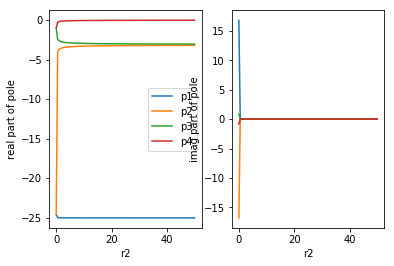

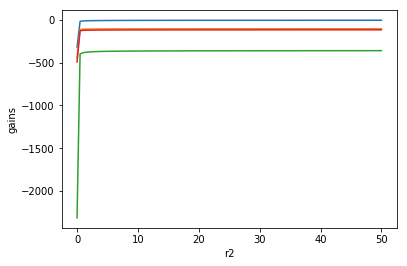

In [108]:
# using constants from Problem 3.6
m, M, l, g, k, R, r = .1, 1., 1., 9.8, 1., 100., .02
A = np.array([[0., 1., 0., 0.], 
              [0., -k**2 / (M*r**2*R), -(m*g)/M, 0.], 
              [0., 0., 0., 1.], 
              [0, k**2 / (M*r**2*R*l), ((M+m)*g)/(M*l), 0.]])
C = np.array([[1., 0., 0., 0.]])
B = np.array([[0.], [k/(M*R*r)], [0.], [-k/(M*R*r*l)]])
Q = np.array([[100, 0, 0, 0], [0, 0, 0, 0], [0, 0, 3000, 0], [0, 0, 0, 0]]).astype('float')
r2 = np.linspace(1e-3, 50, 101)
poles = np.empty((r2.size, A.shape[0])).astype('complex')
gains = np.empty_like(poles).astype('float')  # because this is siso
for i,_r2 in enumerate(r2):
    R = np.array([[_r2]]).astype('float')
    G, _, _ = control.lqr(A, B, Q, R)
    G.reshape((1, A.shape[0]))
    Ac = A-B@G
    e = np.linalg.eigvals(Ac)
    poles[i, :] = np.array(sorted(e, key=lambda x : np.real(x)))
    gains[i, :] = np.array(sorted(G, key=lambda x : x))
plt.figure()
plt.subplot(121)
plt.plot(r2, np.real(poles[:, 0]), label='p1')
plt.plot(r2, np.real(poles[:, 1]), label='p2')
plt.plot(r2, np.real(poles[:, 2]), label='p3')
plt.plot(r2, np.real(poles[:, 3]), label='p4')
plt.xlabel('r2')
plt.ylabel('real part of pole')
plt.legend()
plt.subplot(122)
plt.plot(r2, np.imag(poles[:, 0]), label='p1')
plt.plot(r2, np.imag(poles[:, 1]), label='p2')
plt.plot(r2, np.imag(poles[:, 2]), label='p3')
plt.plot(r2, np.imag(poles[:, 3]), label='p4')
plt.xlabel('r2')
plt.ylabel('imag part of pole')
plt.figure()
plt.plot(r2, gains[:, 0], label='g1')
plt.plot(r2, gains[:, 1], label='g2')
plt.plot(r2, gains[:, 2], label='g3')
plt.plot(r2, gains[:, 3], label='g4')
plt.xlabel('r2')
plt.ylabel('gains')
plt.show()

#### b)
Repeat Part a) but with $q_1^2 = 10^4$ instead of $10^2$.  The poles don't seem to vary much, but the entries of the gain matrix $G$ appear remarkably higher.  The difference in performance doesn't appear to outweigh the potential negative consequences of the higher gain required in this case.

/home/joe/miniconda3/envs/ctrl-friedland/lib/python3.6/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


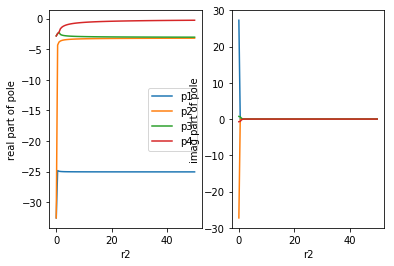

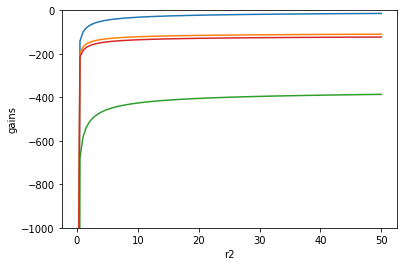

In [109]:
# using constants from Problem 3.6
m, M, l, g, k, R, r = .1, 1., 1., 9.8, 1., 100., .02
A = np.array([[0., 1., 0., 0.], 
              [0., -k**2 / (M*r**2*R), -(m*g)/M, 0.], 
              [0., 0., 0., 1.], 
              [0, k**2 / (M*r**2*R*l), ((M+m)*g)/(M*l), 0.]])
C = np.array([[1., 0., 0., 0.]])
B = np.array([[0.], [k/(M*R*r)], [0.], [-k/(M*R*r*l)]])
Q = np.array([[10000, 0, 0, 0], [0, 0, 0, 0], [0, 0, 3000, 0], [0, 0, 0, 0]]).astype('float').reshape((4, 4))
r2 = np.linspace(1e-3, 50, 101)
poles = np.empty((r2.size, A.shape[0])).astype('complex')
gains = np.empty_like(poles).astype('float')  # because this is siso
for i,_r2 in enumerate(r2):
    R = np.array([[_r2]]).astype('float')
    G, _, _ = control.lqr(A, B, Q, R)
    G.reshape((1, A.shape[0]))
    Ac = A-B@G
    e = np.linalg.eigvals(Ac)
    poles[i, :] = np.array(sorted(e, key=lambda x : np.real(x)))
    gains[i, :] = np.array(sorted(G, key=lambda x : x))
plt.figure()
plt.subplot(121)
plt.plot(r2, np.real(poles[:, 0]), label='p1')
plt.plot(r2, np.real(poles[:, 1]), label='p2')
plt.plot(r2, np.real(poles[:, 2]), label='p3')
plt.plot(r2, np.real(poles[:, 3]), label='p4')
plt.xlabel('r2')
plt.ylabel('real part of pole')
plt.legend()
plt.subplot(122)
plt.plot(r2, np.imag(poles[:, 0]), label='p1')
plt.plot(r2, np.imag(poles[:, 1]), label='p2')
plt.plot(r2, np.imag(poles[:, 2]), label='p3')
plt.plot(r2, np.imag(poles[:, 3]), label='p4')
plt.xlabel('r2')
plt.ylabel('imag part of pole')
plt.figure()
plt.plot(r2, gains[:, 0], label='g1')
plt.plot(r2, gains[:, 1], label='g2')
plt.plot(r2, gains[:, 2], label='g3')
plt.plot(r2, gains[:, 3], label='g4')
plt.xlabel('r2')
plt.ylabel('gains')
plt.ylim([-1000, 0])
plt.show()

### Problem 9.11
#### a)

/home/joe/miniconda3/envs/ctrl-friedland/lib/python3.6/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


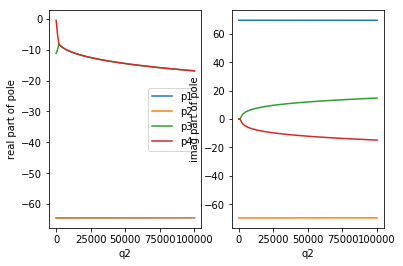

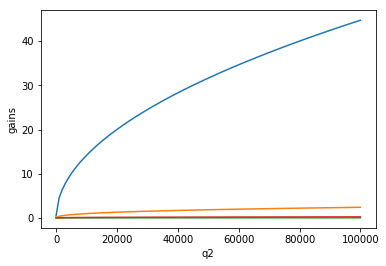

In [110]:
Kv, Lv, J, Km, Omm, Kdp = 94.3, 1.0, 7900., 8.46e6, 45.9, 6.33e-6
#Kv, Lv, J, Km, Omm, Kdp = 94.3, 1.07, 2070., 1.96e6, 17.3, 3.86e-5
A = np.array([[0., 1., 0., 0.],
              [0., 0., 1., 0.],
              [0., -Km/J, -(Km/J)*(Omm*J/Km), (Km/J)],
              [0., 0., -Kv*Kdp*J, -Lv*Kv]]).astype('float').reshape((4, 4))
B = np.array([[0.], [0.], [0.], [Kv]]).astype('float').reshape((4, 1))
C = np.array([[1., 0., 0., 0.]]).astype('float').reshape((1, 4))
D = np.zeros((1, 1)).astype('float').reshape((1, 1))
E = np.zeros((4,3))
E[0, 0] = -1.
E[1, 0] = 1.
E[2, 1] = 1.
E[2, 0] = 1.
E[3, 2] = 1.
E.astype('float')
q2 = np.linspace(1e1, 1e5, 101)
poles = np.empty((q2.size, A.shape[0])).astype('complex')
gains = np.empty_like(poles).astype('float')  # because this is siso
Q = np.zeros_like(A).astype('float')
R = np.array([[50]]).astype('float')
for i,_q2 in enumerate(q2):
    Q[0, 0] = _q2
    G, _, _ = control.lqr(A, B, Q, R)
    G.reshape((1, A.shape[0]))
    Ac = A-B@G
    e = np.linalg.eigvals(Ac)
    poles[i, :] = np.array(sorted(e, key=lambda x : np.real(x)))
    gains[i, :] = np.array(sorted(G, key=lambda x : x))
plt.figure()
plt.subplot(121)
plt.plot(q2, np.real(poles[:, 0]), label='p1')
plt.plot(q2, np.real(poles[:, 1]), label='p2')
plt.plot(q2, np.real(poles[:, 2]), label='p3')
plt.plot(q2, np.real(poles[:, 3]), label='p4')
plt.xlabel('q2')
plt.ylabel('real part of pole')
plt.legend()
plt.subplot(122)
plt.plot(q2, np.imag(poles[:, 0]), label='p1')
plt.plot(q2, np.imag(poles[:, 1]), label='p2')
plt.plot(q2, np.imag(poles[:, 2]), label='p3')
plt.plot(q2, np.imag(poles[:, 3]), label='p4')
plt.xlabel('q2')
plt.ylabel('imag part of pole')
plt.figure()
plt.plot(q2, gains[:, 0], label='g1')
plt.plot(q2, gains[:, 1], label='g2')
plt.plot(q2, gains[:, 2], label='g3')
plt.plot(q2, gains[:, 3], label='g4')
plt.xlabel('q2')
plt.ylabel('gains')
plt.show()

#### b)

In [112]:
G0star = ch9_utils.exogeneousGains(A, B, C, D, E, Q, R)
G0pound = ch9_utils.exogeneousGains(A, B, C, D, E, Q, R, method='optimal')
print('G0star = {}'.format(G0star))
print('G0pound = {}'.format(G0pound))

G0star = [[-3.51279622e+00  1.15516279e-03  1.06044539e-02]]
G0pound = [[-3.51279622e+00  1.15516279e-03  1.06044539e-02]]


### Problem 9.12
#### a)

/home/joe/miniconda3/envs/ctrl-friedland/lib/python3.6/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


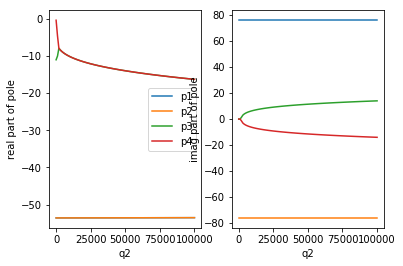

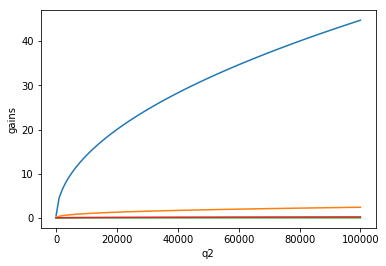

In [113]:
#Kv, Lv, J, Km, Omm, Kdp = 94.3, 1.0, 7900., 8.46e6, 45.9, 6.33e-6
Kv, Lv, J, Km, Omm, Kdp = 94.3, 1.07, 2070., 1.96e6, 17.3, 3.86e-5
A = np.array([[0., 1., 0., 0.],
              [0., 0., 1., 0.],
              [0., -Km/J, -(Km/J)*(Omm*J/Km), (Km/J)],
              [0., 0., -Kv*Kdp*J, -Lv*Kv]]).astype('float').reshape((4, 4))
B = np.array([[0.], [0.], [0.], [Kv]]).astype('float').reshape((4, 1))
C = np.array([[1., 0., 0., 0.]]).astype('float').reshape((1, 4))
D = np.zeros((1, 1)).astype('float').reshape((1, 1))
E = np.zeros((4,3))
E[0, 0] = -1.
E[1, 0] = 1.
E[2, 1] = 1.
E[2, 0] = 1.
E[3, 2] = 1.
E.astype('float')
q2 = np.linspace(1e1, 1e5, 101)
poles = np.empty((q2.size, A.shape[0])).astype('complex')
gains = np.empty_like(poles).astype('float')  # because this is siso
Q = np.zeros_like(A).astype('float')
R = np.array([[50]]).astype('float')
for i,_q2 in enumerate(q2):
    Q[0, 0] = _q2
    G, _, _ = control.lqr(A, B, Q, R)
    G.reshape((1, A.shape[0]))
    Ac = A-B@G
    e = np.linalg.eigvals(Ac)
    poles[i, :] = np.array(sorted(e, key=lambda x : np.real(x)))
    gains[i, :] = np.array(sorted(G, key=lambda x : x))
plt.figure()
plt.subplot(121)
plt.plot(q2, np.real(poles[:, 0]), label='p1')
plt.plot(q2, np.real(poles[:, 1]), label='p2')
plt.plot(q2, np.real(poles[:, 2]), label='p3')
plt.plot(q2, np.real(poles[:, 3]), label='p4')
plt.xlabel('q2')
plt.ylabel('real part of pole')
plt.legend()
plt.subplot(122)
plt.plot(q2, np.imag(poles[:, 0]), label='p1')
plt.plot(q2, np.imag(poles[:, 1]), label='p2')
plt.plot(q2, np.imag(poles[:, 2]), label='p3')
plt.plot(q2, np.imag(poles[:, 3]), label='p4')
plt.xlabel('q2')
plt.ylabel('imag part of pole')
plt.figure()
plt.plot(q2, gains[:, 0], label='g1')
plt.plot(q2, gains[:, 1], label='g2')
plt.plot(q2, gains[:, 2], label='g3')
plt.plot(q2, gains[:, 3], label='g4')
plt.xlabel('q2')
plt.ylabel('gains')
plt.show()

#### b)

In [115]:
G0star = ch9_utils.exogeneousGains(A, B, C, D, E, Q, R)
G0pound = ch9_utils.exogeneousGains(A, B, C, D, E, Q, R, method='optimal')
print('G0star = {}'.format(G0star))
print('G0pound = {}'.format(G0pound))

G0star = [[-3.57701788e+00  1.36996991e-03  1.06044539e-02]]
G0pound = [[-3.57701788e+00  1.36996991e-03  1.06044539e-02]]


### Problem 9.13

In [116]:
# x = [p, q, alpha, h/V]
# x0 = h0 / V
A = np.array([[-1, 1, 0, 0], [-5, -.5, 0, 0], [0, 1, 0, 0], [-1, 0, 1, 0]]).astype('float')
B = np.array([[-.1], [-9], [0], [0]]).astype('float')
C = np.array([[0, 0, 0, 1]]).astype('float').reshape((1, 4))
D = np.zeros((4,1))
E = np.zeros((4, 1))
E[3, 0] = -1.

#### a)

/home/joe/miniconda3/envs/ctrl-friedland/lib/python3.6/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


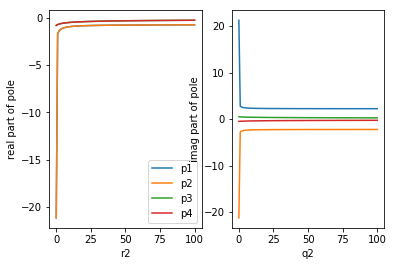

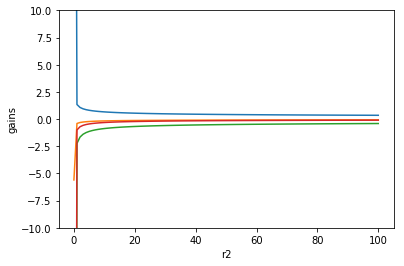

In [117]:
r2 = np.linspace(1e-4, 100, 101)
poles = np.empty((r2.size, A.shape[0])).astype('complex')
gains = np.empty_like(poles).astype('float')  # because this is siso
Q = np.zeros_like(A).astype('float')
Q[2, 2] = 1.
Q[3, 3] = 1.
for i,_r2 in enumerate(r2):
    R = np.array([[_r2]]).astype('float').reshape((1, 1))
    G, _, _ = control.lqr(A, B, Q, R)
    G.reshape((1, A.shape[0]))
    Ac = A-B@G
    e = np.linalg.eigvals(Ac)
    poles[i, :] = np.array(sorted(e, key=lambda x : np.real(x)))
    gains[i, :] = np.array(sorted(G, key=lambda x : x))
plt.figure()
plt.subplot(121)
plt.plot(r2, np.real(poles[:, 0]), label='p1')
plt.plot(r2, np.real(poles[:, 1]), label='p2')
plt.plot(r2, np.real(poles[:, 2]), label='p3')
plt.plot(r2, np.real(poles[:, 3]), label='p4')
plt.xlabel('r2')
plt.ylabel('real part of pole')
plt.legend()
plt.subplot(122)
plt.plot(r2, np.imag(poles[:, 0]), label='p1')
plt.plot(r2, np.imag(poles[:, 1]), label='p2')
plt.plot(r2, np.imag(poles[:, 2]), label='p3')
plt.plot(r2, np.imag(poles[:, 3]), label='p4')
plt.xlabel('q2')
plt.ylabel('imag part of pole')
plt.figure()
plt.plot(r2, gains[:, 0], label='g1')
plt.plot(r2, gains[:, 1], label='g2')
plt.plot(r2, gains[:, 2], label='g3')
plt.plot(r2, gains[:, 3], label='g4')
plt.xlabel('r2')
plt.ylabel('gains')
plt.ylim(-10, 10)
plt.show()

#### b)

/home/joe/miniconda3/envs/ctrl-friedland/lib/python3.6/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


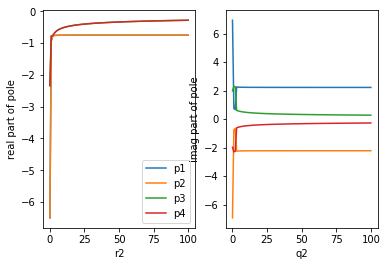

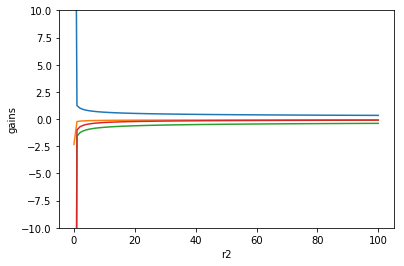

In [118]:
poles = np.empty((r2.size, A.shape[0])).astype('complex')
gains = np.empty_like(poles).astype('float')  # because this is siso
Q = np.zeros_like(A).astype('float')
Q[2, 2] = 1e-2 # c_1^2 = 100c_2^2
Q[3, 3] = 1.
for i,_r2 in enumerate(r2):
    R = np.array([[_r2]]).astype('float').reshape((1, 1))
    G, _, _ = control.lqr(A, B, Q, R)
    G.reshape((1, A.shape[0]))
    Ac = A-B@G
    e = np.linalg.eigvals(Ac)
    poles[i, :] = np.array(sorted(e, key=lambda x : np.real(x)))
    gains[i, :] = np.array(sorted(G, key=lambda x : x))
plt.figure()
plt.subplot(121)
plt.plot(r2, np.real(poles[:, 0]), label='p1')
plt.plot(r2, np.real(poles[:, 1]), label='p2')
plt.plot(r2, np.real(poles[:, 2]), label='p3')
plt.plot(r2, np.real(poles[:, 3]), label='p4')
plt.xlabel('r2')
plt.ylabel('real part of pole')
plt.legend()
plt.subplot(122)
plt.plot(r2, np.imag(poles[:, 0]), label='p1')
plt.plot(r2, np.imag(poles[:, 1]), label='p2')
plt.plot(r2, np.imag(poles[:, 2]), label='p3')
plt.plot(r2, np.imag(poles[:, 3]), label='p4')
plt.xlabel('q2')
plt.ylabel('imag part of pole')
plt.figure()
plt.plot(r2, gains[:, 0], label='g1')
plt.plot(r2, gains[:, 1], label='g2')
plt.plot(r2, gains[:, 2], label='g3')
plt.plot(r2, gains[:, 3], label='g4')
plt.xlabel('r2')
plt.ylabel('gains')
plt.ylim(-10, 10)
plt.show()

#### c)

/home/joe/miniconda3/envs/ctrl-friedland/lib/python3.6/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


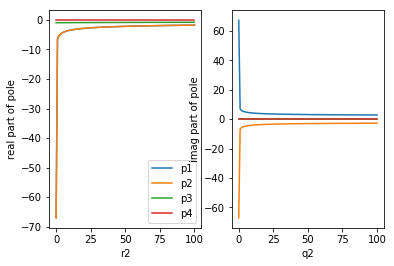

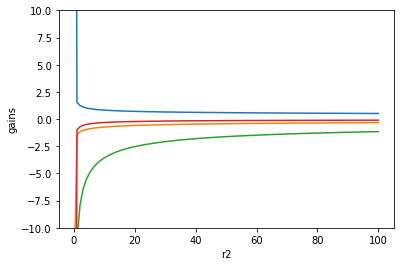

In [119]:
poles = np.empty((r2.size, A.shape[0])).astype('complex')
gains = np.empty_like(poles).astype('float')  # because this is siso
Q = np.zeros_like(A).astype('float')
Q[2, 2] = 1e2 # 100c_1^2 = c_2^2
Q[3, 3] = 1.
for i,_r2 in enumerate(r2):
    R = np.array([[_r2]]).astype('float').reshape((1, 1))
    G, _, _ = control.lqr(A, B, Q, R)
    G.reshape((1, A.shape[0]))
    Ac = A-B@G
    e = np.linalg.eigvals(Ac)
    poles[i, :] = np.array(sorted(e, key=lambda x : np.real(x)))
    gains[i, :] = np.array(sorted(G, key=lambda x : x))
plt.figure()
plt.subplot(121)
plt.plot(r2, np.real(poles[:, 0]), label='p1')
plt.plot(r2, np.real(poles[:, 1]), label='p2')
plt.plot(r2, np.real(poles[:, 2]), label='p3')
plt.plot(r2, np.real(poles[:, 3]), label='p4')
plt.xlabel('r2')
plt.ylabel('real part of pole')
plt.legend()
plt.subplot(122)
plt.plot(r2, np.imag(poles[:, 0]), label='p1')
plt.plot(r2, np.imag(poles[:, 1]), label='p2')
plt.plot(r2, np.imag(poles[:, 2]), label='p3')
plt.plot(r2, np.imag(poles[:, 3]), label='p4')
plt.xlabel('q2')
plt.ylabel('imag part of pole')
plt.figure()
plt.plot(r2, gains[:, 0], label='g1')
plt.plot(r2, gains[:, 1], label='g2')
plt.plot(r2, gains[:, 2], label='g3')
plt.plot(r2, gains[:, 3], label='g4')
plt.xlabel('r2')
plt.ylabel('gains')
plt.ylim(-10, 10)
plt.show()

### Problem 9.14
#### a)

In [121]:
A = np.array([[0.0507, -3.861, 0, -32.17], 
              [-1.17e-3, -.5164, 1, 0], 
              [-1.29e-4, 1.4168, -.4932, 0], 
              [0, 0, 1, 0]]).astype('float').reshape((4, 4))
B = np.array([[0], [-7.17e-2], [-1.645], [0]]).astype('float').reshape((4, 1))
C = np.array([[0, 0, 1, 0]]).astype('float').reshape((1, 4))
Q = np.zeros((4, 4))
Q[2, 2] = 4e-2
R = np.array([[1]]).astype('float').reshape((1, 1))
G, S, _ = control.lqr(A, B, Q, R)
e = np.linalg.eigvals(A-B@G)
print('poles = {}'.format(e))

poles = [-1.73613178+0.j        -0.01710225+0.2082639j -0.01710225-0.2082639j
 -0.73169024+0.j       ]


#### b)
_Could tweak this forever, but..._

In [122]:
A = np.array([[0.0507, -3.861, 0, -32.17], 
              [-1.17e-3, -.5164, 1, 0], 
              [-1.29e-4, 1.4168, -.4932, 0], 
              [0, 0, 1, 0]]).astype('float')
B = np.array([[0], [-7.17e-2], [-1.645], [0]]).astype('float')
C = np.array([[0, 0, 1, 0]]).astype('float')
Q = np.zeros((4, 4))
Q[2, 2] = 4e-2
Q[3, 3] = 3
R = np.array([[1]]).astype('float')
G, S, _ = control.lqr(A, B, Q, R)
G = G.reshape((1, 4))
e = np.linalg.eigvals(A-B@G)
print('poles = {}'.format(e))
print('coeffs = {}'.format(np.poly(e)))

poles = [-1.49610156+0.81550169j -1.49610156-0.81550169j -0.06852958+0.j
 -0.55866932+0.j        ]
coeffs = [1.         3.61940201 4.81835475 1.93554361 0.11115633]


### Problem 9.15
#### a)

In [123]:
A = np.array([[-.746, .006, .001, .0369], 
              [-12.9, -.746, .387, 0], 
              [4.31, .024, -.0174, 0], 
              [0, 1, 0, 0]]).astype('float')
B = np.array([[.0012, 9.2e-3],[6.05, 9.52e-1],[-.416, -1.76],[0, 0]]).astype('float')
Q = np.eye(4)
R = np.array([[1, 0], [0, 1]]).astype('float').reshape((2, 2))
G, S, _ = control.lqr(A, B, Q, R)
e = np.linalg.eigvals(A-B@G)
print('poles = {}'.format(e))
print('coeffs = {}'.format(np.poly(e)))

poles = [-6.12064797 -1.66688123 -0.97601744 -0.75620244]
coeffs = [ 1.          9.51974909 24.43017294 23.42050497  7.53004745]


#### b)

In [124]:
Q = 8e-2*np.eye(4)
R = np.array([[1, 0], [0, 1e-2]]).astype('float')
G, S, _ = control.lqr(A, B, Q, R)
e = np.linalg.eigvals(A-B@G)
print('poles = {}'.format(e))
print('coeffs = {}'.format(np.poly(e)))

poles = [-5.72207644+0.j         -0.79890062+0.34600936j -0.79890062-0.34600936j
 -1.47664697+0.j        ]
coeffs = [ 1.          8.79652465 20.70958074 18.95697871  6.40441263]


#### c)

In [125]:
A = np.array([[-.746, .006, .001, .0369], 
              [-12.9, -.746, .387, 0], 
              [4.31, .024, -.0174, 0], 
              [0, 1, 0, 0]]).astype('float')
B = np.array([[.0012, 9.2e-3],[6.05, 9.52e-1],[-.416, -1.76],[0, 0]]).astype('float')
C = np.array([[0, 0, 1, 0]]).astype('float')
Q = 8e-2*np.eye(4)
R = np.array([[1, 0], [0, 1e-2]]).astype('float')
G0star = ch9_utils.exogeneousGains(A, B, C, D, E, Q, R)
G0pound = ch9_utils.exogeneousGains(A, B, C, D, E, Q, R, method='optimal')
print('G0star = {}'.format(G0star))
print('G0pound = {}'.format(G0pound))

G0star = [[-0.20090023]
 [ 0.06874874]]
G0pound = [[-0.39179632]
 [-0.20272359]]


### Problem 9.16
#### a) and b)

/home/joe/miniconda3/envs/ctrl-friedland/lib/python3.6/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


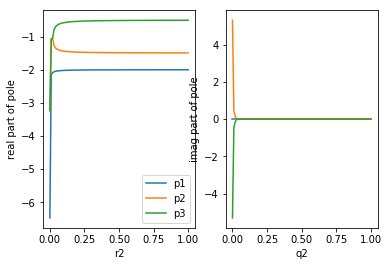

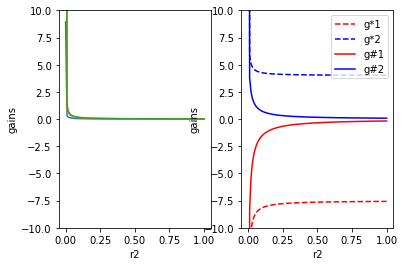

In [127]:
_R, _C = 2., 1.  # don't confuse the R-resistance, C-capacitance with R,C matrices!
A = np.array([[-3./(_R*_C), 1./(_R*_C), 0.],[1./(_R*_C), -2./(_R*_C), 1./(_R*_C)], [0., 1./(_R*_C), -3./(_R*_C)]])
B = np.array([[2. / (_R*_C)], [0.], [0.]])
C = np.array([[0, 0, 1]]).astype('float').reshape((1, 3))
E = np.array([[0., 0.], [0., 1./(_R*_C)], [-3./(_R*_C), 1./(_R*_C)]])
r2 = np.linspace(1e-6, 1, 101)
Q = np.zeros_like(A).astype('float')
Q[2, 2] = 1
poles = np.empty((r2.size, A.shape[0])).astype('complex')
gains = np.empty_like(poles).astype('float')
gainsStar = np.empty((r2.size, E.shape[1]))
gainsPound = np.empty((r2.size, E.shape[1]))
for i,_r2 in enumerate(r2):
    R = np.array([[_r2]]).astype('float').reshape((1, 1))
    G, S, _ = control.lqr(A, B, Q, R)
    G0star = ch9_utils.exogeneousGains(A, B, C, D, E, Q, R)
    G0pound = ch9_utils.exogeneousGains(A, B, C, D, E, Q, R, method='optimal')
    Ac = A-B@G
    e = np.linalg.eigvals(Ac)
    poles[i, :] = np.array(sorted(e, key=lambda x : np.real(x)))
    gains[i, :] = np.array(sorted(G, key=lambda x : x))
    gainsStar[i, :] = np.array(sorted(G0star, key=lambda x : x))
    gainsPound[i, :] = np.array(sorted(G0pound, key=lambda x : x))
plt.figure()
plt.subplot(121)
plt.plot(r2, np.real(poles[:, 0]), label='p1')
plt.plot(r2, np.real(poles[:, 1]), label='p2')
plt.plot(r2, np.real(poles[:, 2]), label='p3')
plt.xlabel('r2')
plt.ylabel('real part of pole')
plt.legend()
plt.subplot(122)
plt.plot(r2, np.imag(poles[:, 0]), label='p1')
plt.plot(r2, np.imag(poles[:, 1]), label='p2')
plt.plot(r2, np.imag(poles[:, 2]), label='p3')
plt.xlabel('q2')
plt.ylabel('imag part of pole')
plt.show()
plt.subplot(121)
plt.plot(r2, gains[:, 0], label='g1')
plt.plot(r2, gains[:, 1], label='g2')
plt.plot(r2, gains[:, 2], label='g3')
plt.xlabel('r2')
plt.ylabel('gains')
plt.ylim(-10, 10)
plt.subplot(122)
plt.plot(r2, gainsStar[:, 0], 'r--', label='g*1')
plt.plot(r2, gainsStar[:, 1], 'b--', label='g*2')
plt.plot(r2, gainsPound[:, 0], 'r', label='g#1')
plt.plot(r2, gainsPound[:, 1], 'b', label='g#2')
plt.legend()
plt.xlabel('r2')
plt.ylabel('gains')
plt.ylim(-10, 10)
plt.show()

### Problem 9.17
#### a) and b)

In [128]:
A = np.array([[-30.3, 0, 0, 0], 
              [1.2e-4, -6.02, 0, 0], 
              [0, -3.77, 0, 0], 
              [0, -2.80, 0, 0]]).astype('float').reshape((4, 4))
B = np.array([[6.15e5, 0],[0, 0],[0, 3.04],[0, 0.052]]).astype('float').reshape((4, 2))
C = np.array([[0, 0, -7.3, 0], [0, 0, 0, -25]]).astype('float').reshape((2, 4))
Q = 100.*np.eye(4)
E = np.array([[0, 0], [0, 0], [62.2, 5.76], [0, 5.12]]).astype('float').reshape((4, 2))
r1Sq = np.linspace(1e4, 1e8, 5)  # vary these if you want to plot out more combinations
r2Sq = np.linspace(1e-2, 1, 5)
for _r1 in r1Sq:
    for _r2 in r2Sq:
        R = np.array([[1, 0], [0, 1e-2]]).astype('float').reshape((2, 2))
        G, S, _ = control.lqr(A, B, Q, R)
        G = G.reshape((2, 4))
        Ac = A-B@G
        e = np.linalg.eigvals(Ac)
        G0star = ch9_utils.exogeneousGains(A, B, C, D, E, Q, R)
        G0pound = ch9_utils.exogeneousGains(A, B, C, D, E, Q, R, method='optimal')
        # uncomment to plot (this is a lot of output)
        #print('+++++ r1^2 = {}, r2^2 = {} +++++'.format(_r1, _r2))
        #print('poles: {}'.format(e))
        #print('feedback gains: {}'.format(G))
        #print('G#: {}'.format(G0pound))
        #print('G*: {}'.format(G0star))

### Problem 9.18
#### a) and b)

In [130]:
A = np.array([[0, -1.56e-3, -7.11e-2, 0, 0], 
              [0, -1.419e-1, 7.11e-2, 0, 0],
              [0, -8.75e-3, -1.102, 0, 0],
              [0, -1.28e-3, -.1489, 0, -1.3e-3], 
              [0, 6.05e-2, .1489, 0, -5.91e-2]]).astype('float').reshape((5, 5))
B = np.array([[0, -.143],[0, 0],[.392, 0],[0, 0.108], [0, -.0486]]).astype('float').reshape((5, 2))
C = np.array([[1, 0, 0, 0, 0], [0, 0, 0, 1, 0]]).astype('float').reshape((2, 5))
E = np.array([[0.2174, 0, 0], [-.074, .1434, 0], [-.036, 0, .1814], [0, 0, 0], [0, 0, 0]]).astype('float').reshape((5, 3))
r2 = np.linspace(1e-3, 1, 101)
Q = np.zeros_like(A).astype('float')
Q[0, 0] = 1.
Q[3, 3] = 1.5
poles = np.empty((r2.size, A.shape[0])).astype('complex')
gains = np.empty_like(poles).astype('float')
gainsStar = np.empty((r2.size, E.shape[1]))
gainsPound = np.empty((r2.size, E.shape[1]))
for i,_r2 in enumerate(r2):
    R = _r2 * np.eye(2)
    G, S, _ = control.lqr(A, B, Q, R)
    G.reshape((2, A.shape[0]))
    Ac = A-B@G
    G0star = ch9_utils.exogeneousGains(A, B, C, D, E, Q, R)
    G0pound = ch9_utils.exogeneousGains(A, B, C, D, E, Q, R, method='optimal')
    e = np.linalg.eigvals(Ac)
    # uncomment to plot (this is a lot of output)
    #print('+++++ r^2 = {} +++++'.format(_r2))
    #print('G : {}'.format(G))
    #print('poles : {}'.format(poles))
    #print('G : {}'.format(G))
    #print('G : {}'.format(G))

/home/joe/miniconda3/envs/ctrl-friedland/lib/python3.6/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
